In [2]:
from bs4 import BeautifulSoup as bs
import requests
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
amazon_url = "https://en.wikipedia.org/wiki/Amazon_(company)"

In [22]:
data = requests.get(amazon_url)
data_text = bs(data.text, "html")

In [23]:
table_data = data_text.find("table", class_ = "wikitable float-left")

In [24]:
# Table data, columns names

In [25]:
table_data

<table class="wikitable float-left" style="text-align: right;">
<tbody><tr>
<th>Year
</th>
<th>Revenue<sup class="reference" id="cite_ref-167"><a href="#cite_note-167">[167]</a></sup><br/>in million US$
</th>
<th>Net income<br/>in million US$
</th>
<th>Total Assets<br/>in million US$
</th>
<th>Employees
</th></tr>
<tr>
<td align="left">1995<sup class="reference" id="cite_ref-auto3_168-0"><a href="#cite_note-auto3-168">[168]</a></sup>
</td>
<td>0.5
</td>
<td>−0.3
</td>
<td>1.1
</td>
<td>
</td></tr>
<tr>
<td align="left">1996<sup class="reference" id="cite_ref-auto3_168-1"><a href="#cite_note-auto3-168">[168]</a></sup>
</td>
<td>16
</td>
<td>−6
</td>
<td>8
</td>
<td>
</td></tr>
<tr>
<td align="left">1997<sup class="reference" id="cite_ref-auto3_168-2"><a href="#cite_note-auto3-168">[168]</a></sup>
</td>
<td>148
</td>
<td>−28
</td>
<td>149
</td>
<td>614
</td></tr>
<tr>
<td align="left">1998<sup class="reference" id="cite_ref-auto2_169-0"><a href="#cite_note-auto2-169">[169]</a></sup>
</td

In [26]:
th_data = table_data.find_all("th")

In [27]:
th_data

[<th>Year
 </th>,
 <th>Revenue<sup class="reference" id="cite_ref-167"><a href="#cite_note-167">[167]</a></sup><br/>in million US$
 </th>,
 <th>Net income<br/>in million US$
 </th>,
 <th>Total Assets<br/>in million US$
 </th>,
 <th>Employees
 </th>]

In [28]:
columns_name = [re.sub(r"[\[\d\]]", "", row.text.strip()) for row in th_data]

In [29]:
# DataFrame cleaning

In [39]:
df = pd.DataFrame(columns=columns_name)

In [40]:
tr_data = table_data.find_all("tr")[1:]

In [41]:
for tr in tr_data:
    rows = tr.find_all("td")
    row_data = [re.sub(r"(\[\d+\])", "", row.text.strip()) for row in rows]
    number_point = [re.sub(r",", "", n) for n in row_data]
    df.loc[len(df)] = number_point

['1995', '0.5', '−0.3', '1.1', '']
['1996', '16', '−6', '8', '']
['1997', '148', '−28', '149', '614']
['1998', '610', '−124', '648', '2100']
['1999', '1639', '−720', '2466', '7600']
['2000', '2761', '−1411', '2135', '9000']
['2001', '3122', '−567', '1638', '7800']
['2002', '3932', '−149', '1990', '7500']
['2003', '5263', '35', '2162', '7800']
['2004', '6921', '588', '3248', '9000']
['2005', '8490', '359', '3696', '12000']
['2006', '10711', '190', '4363', '13900']
['2007', '14835', '476', '6485', '17000']
['2008', '19166', '645', '8314', '20700']
['2009', '24509', '902', '13813', '24300']
['2010', '34204', '1152', '18797', '33700']
['2011', '48077', '631', '25278', '56200']
['2012', '61093', '−39', '32555', '88400']
['2013', '74452', '274', '40159', '117300']
['2014', '88988', '−241', '54505', '154100']
['2015', '107006', '596', '64747', '230800']
['2016', '135987', '2371', '83402', '341400']
['2017', '177866', '3033', '131310', '566000']
['2018', '232887', '10073', '162648', '647500']


In [42]:
df

,Year,Revenuein million US$,Net incomein million US$,Total Assetsin million US$,Employees
0,1995,0.5,−0.3,1.1,
1,1996,16,−6,8,
2,1997,148,−28,149,614
3,1998,610,−124,648,2100
4,1999,1639,−720,2466,7600
5,2000,2761,−1411,2135,9000
6,2001,3122,−567,1638,7800
7,2002,3932,−149,1990,7500
8,2003,5263,35,2162,7800
9,2004,6921,588,3248,9000


In [43]:
df["Employees"] = df["Employees"].replace('', np.nan)
df = df.fillna(0)

In [44]:
def convert_float(column):
    return column.astype(float)

In [48]:
df["Revenuein million US$"] = convert_float(df["Revenuein million US$"])
df["Net incomein million US$"] = convert_float(df["Net incomein million US$"])
df["Total Assetsin million US$"] = convert_float(df["Total Assetsin million US$"])
df["Employees"] = convert_float(df["Employees"])

In [49]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year

In [50]:
df

,Year,Revenuein million US$,Net incomein million US$,Total Assetsin million US$,Employees
0,1995,0.5,0.5,1.1,0.0
1,1996,16.0,16.0,8.0,0.0
2,1997,148.0,148.0,149.0,614.0
3,1998,610.0,610.0,648.0,2100.0
4,1999,1639.0,1639.0,2466.0,7600.0
5,2000,2761.0,2761.0,2135.0,9000.0
6,2001,3122.0,3122.0,1638.0,7800.0
7,2002,3932.0,3932.0,1990.0,7500.0
8,2003,5263.0,5263.0,2162.0,7800.0
9,2004,6921.0,6921.0,3248.0,9000.0


In [51]:
df.isna().sum()

Year                          0
Revenuein million US$         0
Net incomein million US$      0
Total Assetsin million US$    0
Employees                     0
dtype: int64

In [52]:
df.dtypes

Year                            int32
Revenuein million US$         float64
Net incomein million US$      float64
Total Assetsin million US$    float64
Employees                     float64
dtype: object

In [53]:
df.to_csv("amazon_revenue.csv", index=False)

In [54]:
# Data Visualization

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Revenuein million US$'}>],
       [<Axes: title={'center': 'Net incomein million US$'}>,
        <Axes: title={'center': 'Total Assetsin million US$'}>],
       [<Axes: title={'center': 'Employees'}>, <Axes: >]], dtype=object)

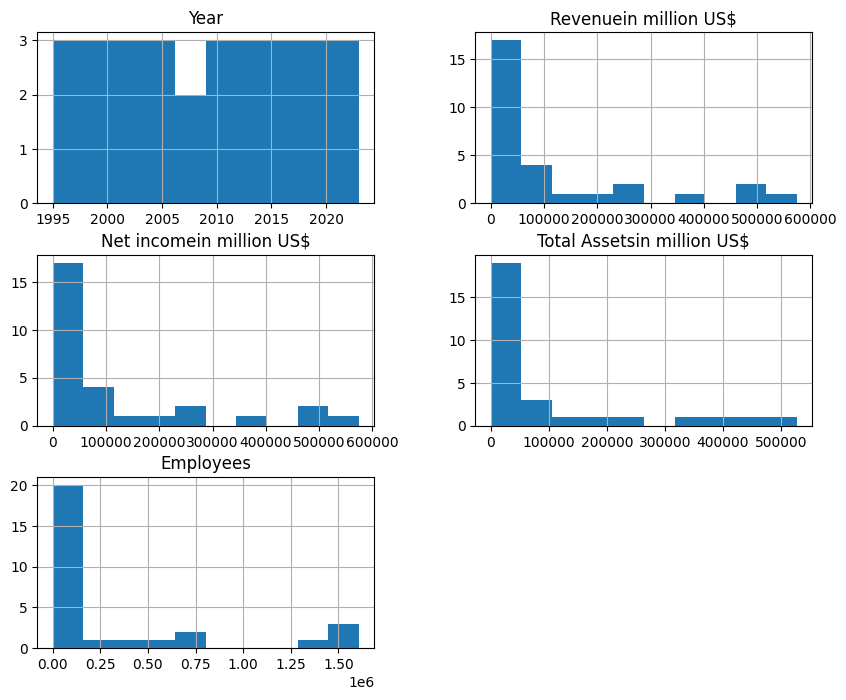

In [55]:
df.hist( figsize=(10, 8))

In [56]:
df = pd.read_csv("amazon_revenue.csv")

In [57]:
df.columns

Index(['Year', 'Revenuein million US$', 'Net incomein million US$',
       'Total Assetsin million US$', 'Employees'],
      dtype='object')

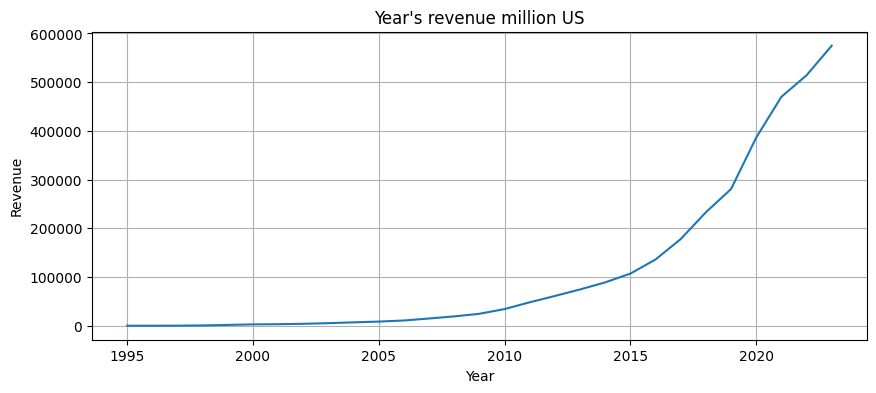

In [58]:
plt.figure(figsize=(10, 4))
plt.plot(df["Year"], df["Revenuein million US$"])
plt.title("Year's revenue million US")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.grid(True)

Text(0, 0.5, 'Employee')

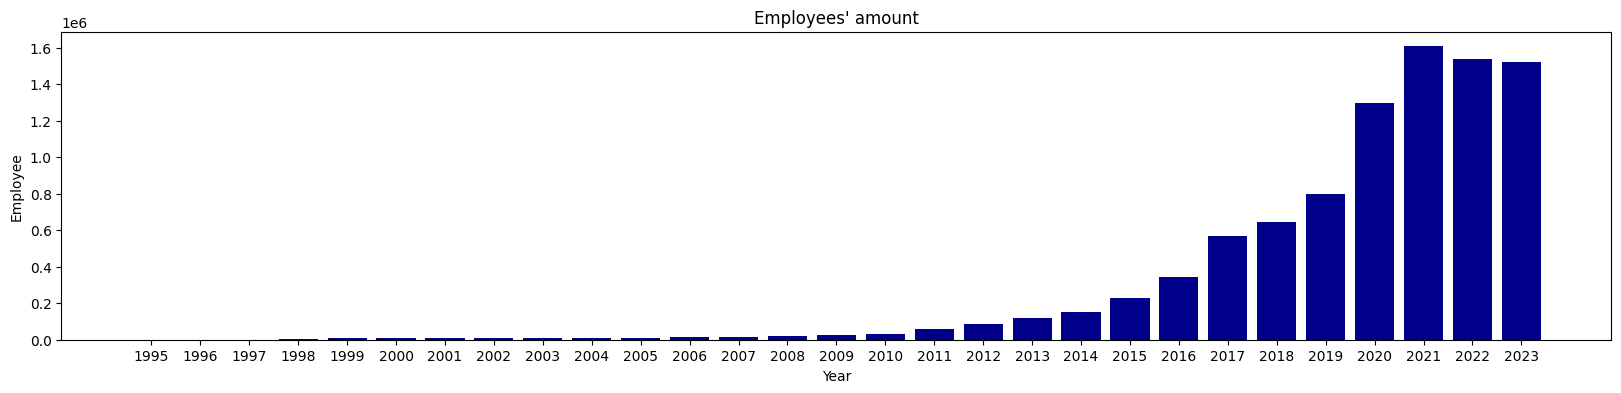

In [59]:
plt.figure(figsize=(20, 4))
plt.bar(df["Year"], df["Employees"], color="darkblue")
plt.title("Employees' amount")
plt.xticks(df["Year"])
plt.xlabel("Year")
plt.ylabel("Employee")
